# Missing Films
### Highly rated Films that are missing from the Netflix Catalogue

outer merge data sets
  - add merge column

Drop anything without a numerical RT rating

Sort descending on chosen rating

Mark according to merge column (left_only vs both)

Those that are 'left only' but highly rated are missing from Netflix and worth adding/replicating

#### Import Libraries

In [45]:
import pandas as pd
import plotly.express as px
import slugify as slugify

Create DataFrame from Netflix CSV, filtered to just movies

Create DataFrame from Rotten Tomatoes Movies CSV

In [46]:
netflix_movies_df = pd.read_csv('./data/netflix-titles.csv', parse_dates=['date_added'])
netflix_movies_df = netflix_movies_df[netflix_movies_df["type"] == 'Movie']
rotten_movies_df = pd.read_csv('./data/rotten_tomatoes_movies.csv')

Extract release_year from Rotten Tomatoes original_release_date

In [47]:
rotten_movies_df["release_year"] = rotten_movies_df["original_release_date"].str.split('-').str[0]

Add Unique identifier column to both DataFrames for merging

In [48]:
netflix_movies_df["title_and_release_year"] = netflix_movies_df["title"] + " " + netflix_movies_df["release_year"].astype(str)
netflix_movies_df["title_and_release_year"] = netflix_movies_df["title_and_release_year"].apply(slugify.slugify)

rotten_movies_df["title_and_release_year"] = rotten_movies_df["movie_title"] + " " + rotten_movies_df["release_year"].astype(str)
rotten_movies_df["title_and_release_year"] = rotten_movies_df["title_and_release_year"].apply(slugify.slugify)

Merge the above datasets, returning both datasets in one dataframe, combining the rows that overlap ton the unique key generated

In [10]:
netflix_plus_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="outer", on="title_and_release_year", indicator=True)

mapping_dict = {
  "left_only": "Netflix",
  "both": "Both",
  "right_only": "Rotten Tomatoes",
}

netflix_plus_rt_df.rename(columns={"_merge":"dataset_location"}, inplace=True)
netflix_plus_rt_df.replace({"dataset_location": mapping_dict}, inplace=True)


In [49]:
netflix_plus_rt_df.describe()

,release_year_x,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,6131.000000,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,2013.121514,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,9.678169,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,1942.000000,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,2012.000000,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,2016.000000,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,2018.000000,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,2021.000000,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


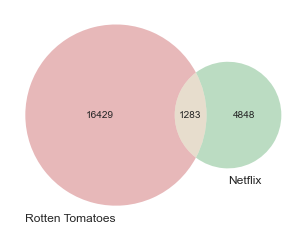

Netflix Only: 4848
Netflix and on Rotten Tomatoes: 1283
Netflix Total: 6131
Not on Netflix: 16429


In [12]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

netflix_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Netflix"])
rotten_tomatoes_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Rotten Tomatoes"])
overlap_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Both"])

missing_from_netflix_df = netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Rotten Tomatoes"]

# Use the venn2 function
venn2(subsets = (rotten_tomatoes_count, netflix_count, overlap_count), set_labels = ('Rotten Tomatoes', 'Netflix'))
plt.show()

print(f"Netflix Only: {netflix_count}")
print(f"Netflix and on Rotten Tomatoes: {overlap_count}")
print(f"Netflix Total: {netflix_count + overlap_count}")
print(f"Not on Netflix: {rotten_tomatoes_count}")

#### For better merges it would be useful to find out which of the Netflix Only are being missed from the Rotten Tomatoes Only

Example would be 'Dark Crimes' - has different years in each so slug is not the same

In [13]:
missing_from_netflix_df = netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Rotten Tomatoes"]
missing_from_netflix_df = missing_from_netflix_df.dropna(axis="columns", how="all")
missing_from_netflix_df.sort_values("audience_count", ascending=False, inplace=True)

In [14]:
missing_films_by_audience_count_bar = px.bar(
  missing_from_netflix_df,
  x="movie_title",
  y="audience_count"
)

missing_films_by_audience_count_bar.update_layout(
  xaxis_tickangle=-45
  )

missing_films_by_audience_count_bar.show()

Below import solves an error when importing the seaborn example datasets

Won't be needed once those examples aren't being used

In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

[Text(0.5, 0, 'Viewers'), Text(0, 0.5, '')]

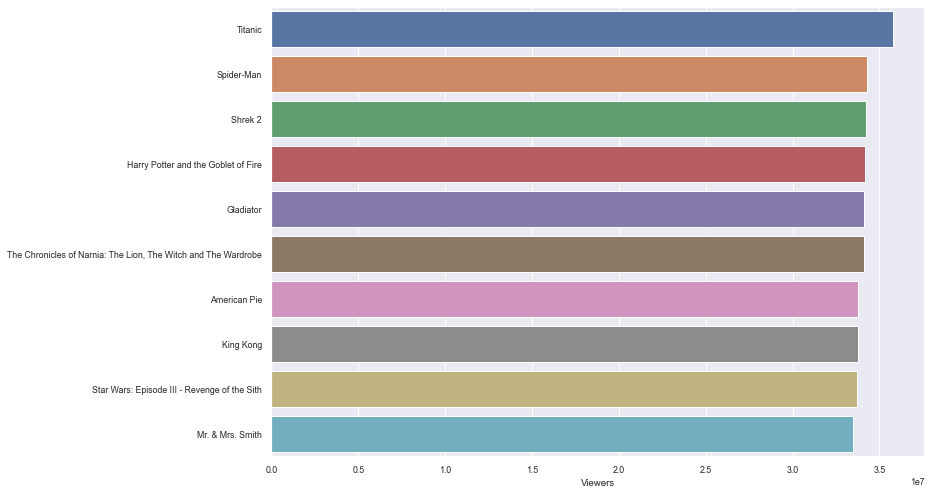

In [56]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = .8)

upper_limit = 50

ax = sns.barplot(
  x="audience_count",
  y="movie_title",
  data=missing_from_netflix_df.iloc[0:upper_limit],
  orient="h"
)
upper_limit = 10

ax = sns.barplot(
  x="audience_count",
  y="movie_title",
  data=missing_from_netflix_df.iloc[0:upper_limit],
  orient="h",
)
ax.set( xlabel = "Viewers", ylabel = "")

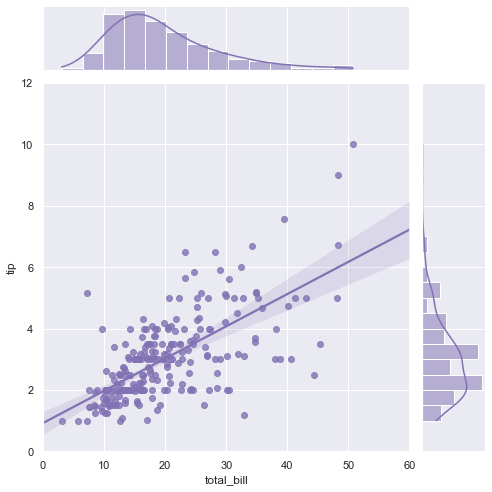

In [24]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)